In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam

In [ ]:
#Mount drive to access files in gdrive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/Datasets/redraw-dataset.zip

In [ ]:

train_dataset = ImageDataGenerator(rescale=1/255).flow_from_directory('/content/dataset/train', 
                    target_size=(64,64),
                    batch_size=5,
                    class_mode='categorical')
validation_dataset = ImageDataGenerator(rescale=1/255).flow_from_directory('/content/dataset/validation', 
                    target_size=(64,64),
                    batch_size=5,
                    class_mode='categorical')

Found 9470 images belonging to 15 classes.
Found 3828 images belonging to 15 classes.


In [ ]:
print(validation_dataset.class_indices)
print(train_dataset.class_indices)

{'Button': 0, 'CheckBox': 1, 'CheckedTextView': 2, 'EditText': 3, 'ImageButton': 4, 'ImageView': 5, 'NumberPicker': 6, 'ProgressBar': 7, 'RadioButton': 8, 'RatingBar': 9, 'SeekBar': 10, 'Spinner': 11, 'Switch': 12, 'TextView': 13, 'ToggleButton': 14}
{'Button': 0, 'CheckBox': 1, 'CheckedTextView': 2, 'EditText': 3, 'ImageButton': 4, 'ImageView': 5, 'NumberPicker': 6, 'ProgressBar': 7, 'RadioButton': 8, 'RatingBar': 9, 'SeekBar': 10, 'Spinner': 11, 'Switch': 12, 'TextView': 13, 'ToggleButton': 14}


In [ ]:
layers = [
    tf.keras.layers.InputLayer((64,64,3), batch_size=5),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),        
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),    
    tf.keras.layers.Dense(15, activation='softmax')
]
model = tf.keras.models.Sequential(layers=layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (5, 62, 62, 32)           896       
_________________________________________________________________
conv2d_1 (Conv2D)            (5, 60, 60, 64)           18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (5, 58, 58, 128)          73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (5, 29, 29, 128)          0         
_________________________________________________________________
dropout (Dropout)            (5, 29, 29, 128)          0         
_________________________________________________________________
flatten (Flatten)            (5, 107648)               0         
_________________________________________________________________
dense (Dense)                (5, 128)                  1

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=25,
                      epochs=100,
                      validation_data=validation_dataset)

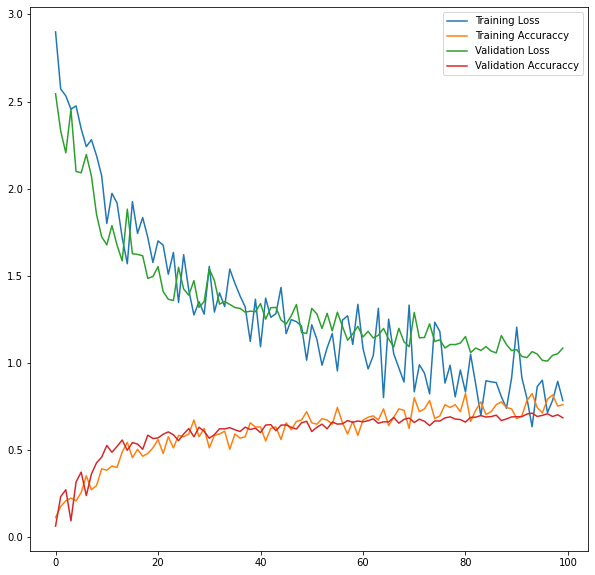

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(100), model_fit.history['loss'], label = 'Training Loss')
plt.plot(range(100), model_fit.history['accuracy'], label = 'Training Accuraccy')
plt.plot(range(100), model_fit.history['val_loss'], label = 'Validation Loss')
plt.plot(range(100), model_fit.history['val_accuracy'], label = 'Validation Accuraccy')
plt.legend()
plt.show()

In [ ]:
# Testing
test_img = image.load_img('/content/dataset/test/ProgressBar/100111-android.widget.ProgressBarVertical.png', target_size=(64,64))
#test_img = image.load_img('testing/radio1.png', target_size=(64,64))
X = image.img_to_array(test_img)
X = np.expand_dims(X, axis=0)
images = np.vstack([X])
predicted_val = model.predict(X)
predicted_val


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.1401273e-28, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
predicted = np.argmax(predicted_val)
predicted

5

In [ ]:
model_fit.model.save('redraw-cnn.h5', overwrite=True)

In [ ]:
!cp redraw-cnn.h5 gdrive/MyDrive/Datasets/